In [4]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

random_data = IntervalData.make_interval_blobs(n_samples=100, n_clusters=3, n_dims = 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
    Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0         -4.055480        -3.756772        -0.908972         3.373334   
1         -1.234994         0.635347        -2.148381         1.585474   
2         -4.374773        -3.540782        -1.276449         1.550030   
3         -2.945224        -2.845224        -0.117435         2.864518   
4          1.915794         3.825158        -0.590719         2.286539   
..              ...              ...              ...              ...   
95         3.070052         3.348196         5.455939         7.848130   
96        -3.403228        -3.303228         0.452851         3.431856   
97        -6.151321        -4.198923         0.172189         2.958407   
98         1.333815         4.284360         0.466572         3.158831   
99         1.791703         5.045766         0.013172         3.755419   

    Feature_3_lower  Feature_3_upper  
0          0.551516         2.655441  
1        

In [5]:

hmodel = IntervalAgglomerativeClustering(n_clusters=3, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[1 0 1 1 0 2 1 1 2 2 1 2 1 1 0 2 2 0 0 1 0 2 2 2 1 1 0 0 1 2 1 2 1 2 1 2 2
 0 0 2 0 2 1 1 1 1 0 0 1 1 2 1 0 1 2 0 1 0 1 2 2 2 2 1 1 0 0 2 2 1 2 2 0 1
 1 0 0 2 0 2 2 0 0 0 2 0 0 0 1 2 0 2 0 0 2 2 1 1 0 0]
{'linkage_matrix': array([[ 65.        ,  81.        ,   0.77412163,   2.        ],
       [ 43.        ,  51.        ,   0.83223977,   2.        ],
       [ 56.        ,  96.        ,   0.93440919,   2.        ],
       [  8.        ,  54.        ,   0.9739769 ,   2.        ],
       [ 12.        ,  49.        ,   1.0126502 ,   2.        ],
       [ 46.        ,  55.        ,   1.05013472,   2.        ],
       [ 27.        ,  93.        ,   1.09927051,   2.        ],
       [ 47.        ,  76.        ,   1.11047148,   2.        ],
       [ 16.        ,  95.        ,   1.17460612,   2.        ],
       [  4.        ,  75.        ,   1.18567507,   2.        ],
       [ 10.        ,  73.        ,   1.21020484,   2.        ],
       [ 37.        , 107.        ,   1.21145981,   3.        

Requested clusters: 5, Actual clusters: 5


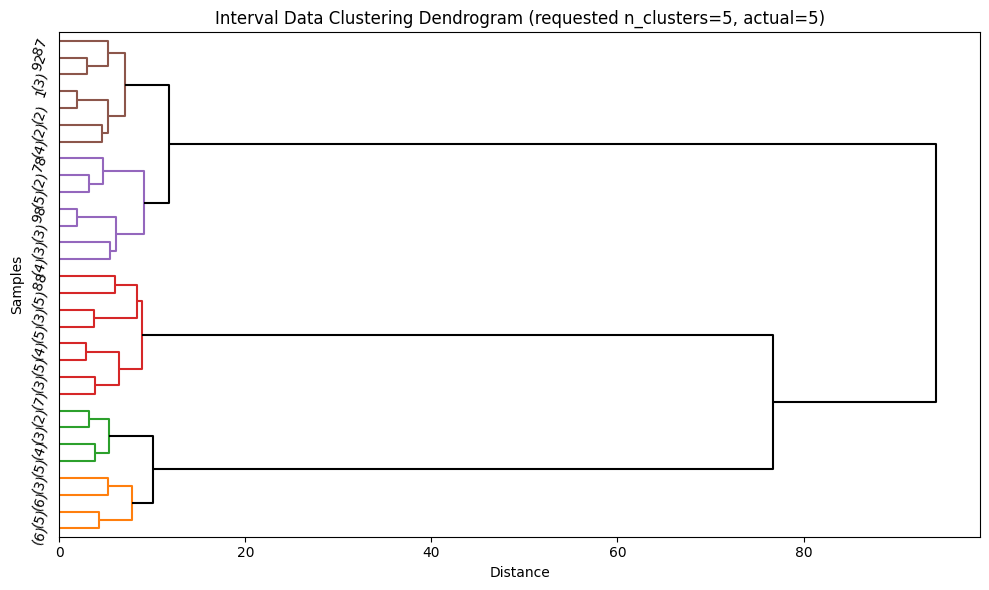

In [6]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='right',
    show_leaf_counts=True
)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

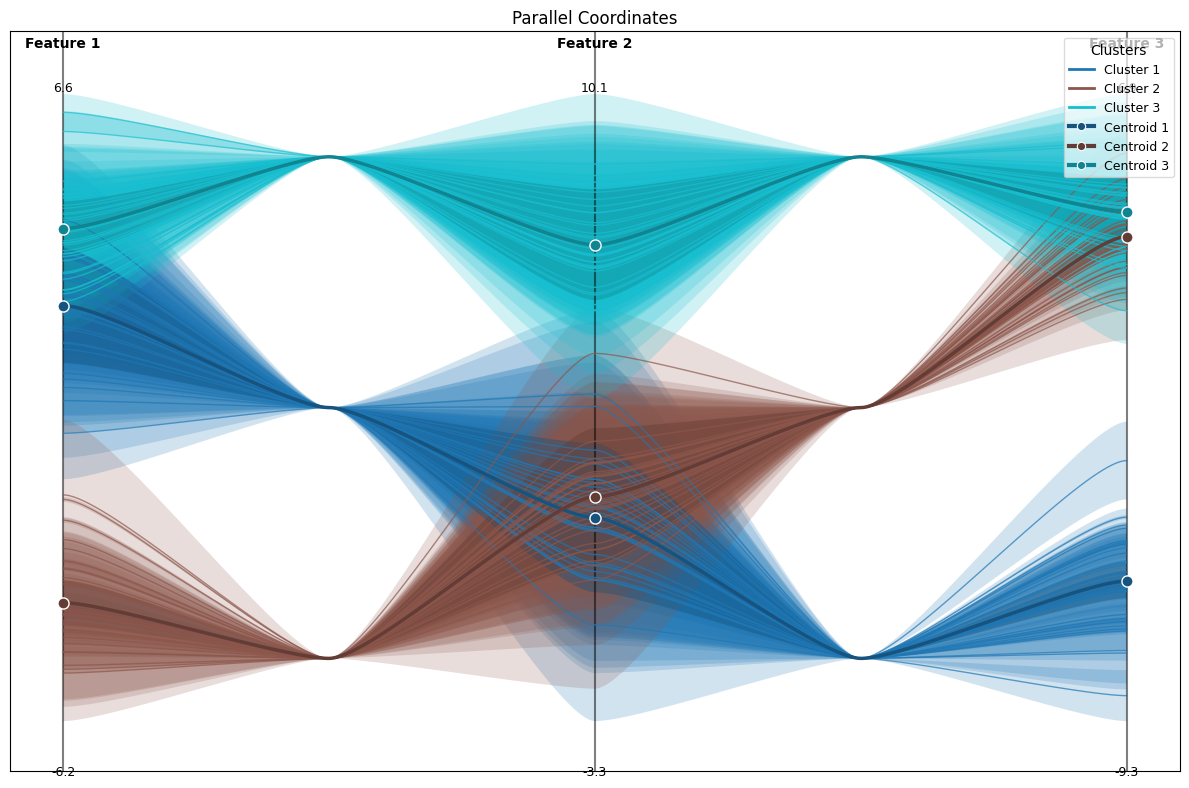

In [7]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True)


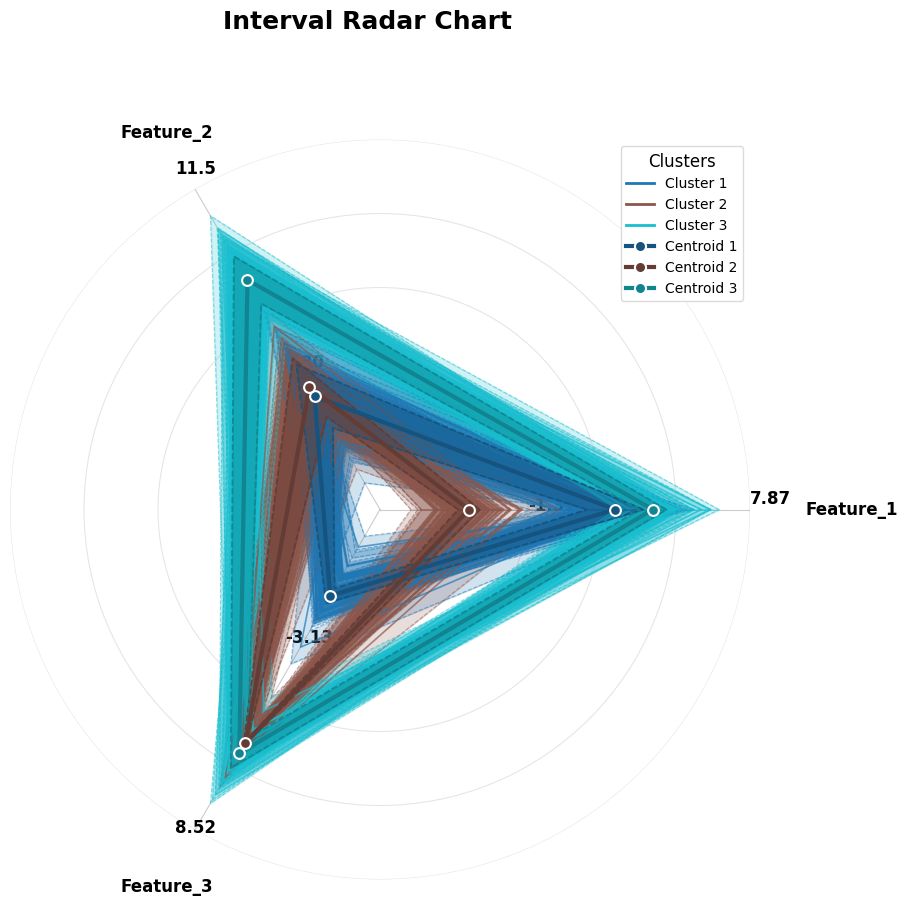

In [8]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

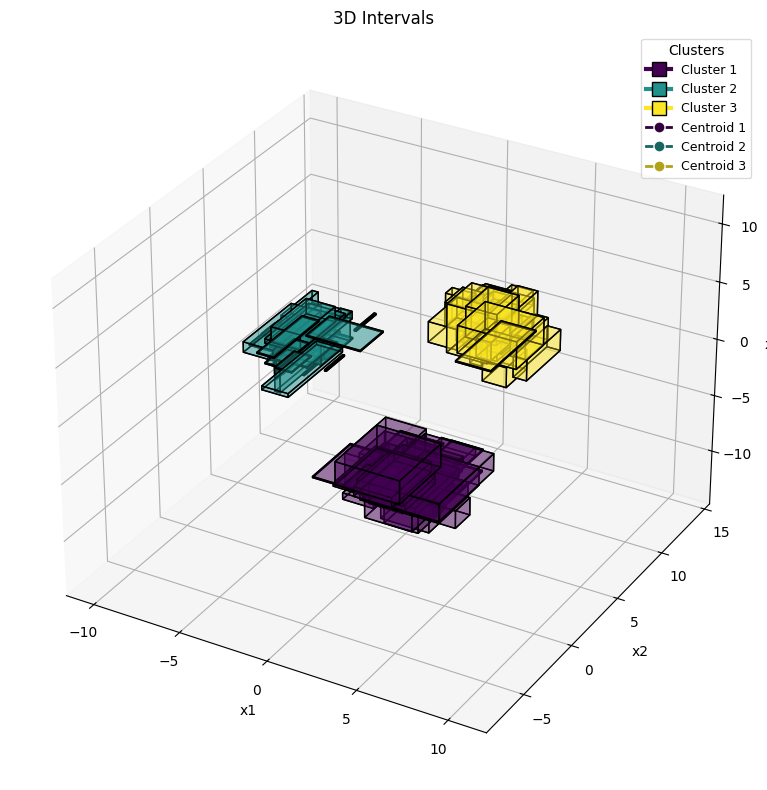

In [9]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= hmodel.centroids_, labels = hmodel.labels_)